# IMPORT LIBRARIES AND DATASET 

Data Source: https://www.kaggle.com/c/rossmann-store-sales/data

In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import numpy as np
import datetime

## IMPORT SALES TRAINING DATA

In [1]:
cd "/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/SALES"

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/SALES'
/content


In [4]:
# You have to include the full link to the csv file containing your dataset
sales_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/SALES/train.csv')
sales_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
# almost a million observation 
# 1115 unique stores 
# Note that sales is the target variable (that's what we are trying to predict) 

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not (0 = no promo, 1 = promo)
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools (0 = no school holidays, 1 = school holidays)

In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# 9 columns in total 
# 8 features, each contains 1017209 data points
# 1 target variable (sales)

In [18]:
with pd.option_context('float_format', '{:.2f}'.format):
  display(sales_df.describe())

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


In [ ]:
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

## IMPORT STORE INFORMATION DATA

In [5]:
store_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/UDEMY_DATA_SCIENCE/SALES/store.csv')
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [21]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [143]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study 
with pd.option_context('float_format', '{:.2f}'.format):
  display(store_df.describe())

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1112.00,761.00,761.00,1115.00,571.00,571.00
mean,558.00,5404.90,7.22,2008.67,0.51,23.60,2011.76
std,322.02,7663.17,3.21,6.20,0.50,14.14,1.67
min,1.00,20.00,1.00,1900.00,0.00,1.00,2009.00
25%,279.50,717.50,4.00,2006.00,0.00,13.00,2011.00
50%,558.00,2325.00,8.00,2010.00,1.00,22.00,2012.00
75%,836.50,6882.50,10.00,2013.00,1.00,37.00,2013.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [ ]:
# on average, the competition distance is 5404 meters away (5.4 kms)

# EXPLORE DATASET

EXPLORE SALES TRAINING DATA

In [24]:
with pd.option_context('float_format', '{:.2f}'.format):
  display(sales_df.describe())

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


In [ ]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time

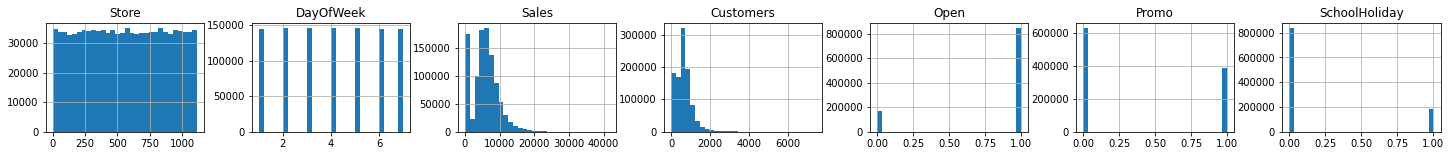

In [236]:
sales_df.hist(bins=30, layout=(1,7), figsize=(25,2))
plt.show()

let's look at store n°1
- many records for same store corresponding to different dates

In [6]:
sales_df[sales_df['Store']==1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1


Let's group by date and status (Open vs Closed)

In [265]:
# Count the number of stores that are open and closed
sales_df.groupby(['Date','Open'], as_index=False).Store.count()

,Date,Open,Store
0,2013-01-01,0,1097
1,2013-01-01,1,17
2,2013-01-02,0,4
3,2013-01-02,1,1111
4,2013-01-03,0,6
...,...,...,...
1631,2015-07-29,1,1113
1632,2015-07-30,0,2
1633,2015-07-30,1,1113
1634,2015-07-31,0,2


In [320]:

table = sales_df.groupby(['Date','Open'], as_index=False).Store.count()
table

,Date,Open,Store
0,2013-01-01,0,1097
1,2013-01-01,1,17
2,2013-01-02,0,4
3,2013-01-02,1,1111
4,2013-01-03,0,6
...,...,...,...
1631,2015-07-29,1,1113
1632,2015-07-30,0,2
1633,2015-07-30,1,1113
1634,2015-07-31,0,2


In [309]:
table.Date = pd.to_datetime(table['Date'], format='%Y-%m-%d')
table

,Date,Open,Store
0,2013-01-01,0,1097
1,2013-01-01,1,17
2,2013-01-02,0,4
3,2013-01-02,1,1111
4,2013-01-03,0,6
...,...,...,...
1631,2015-07-29,1,1113
1632,2015-07-30,0,2
1633,2015-07-30,1,1113
1634,2015-07-31,0,2


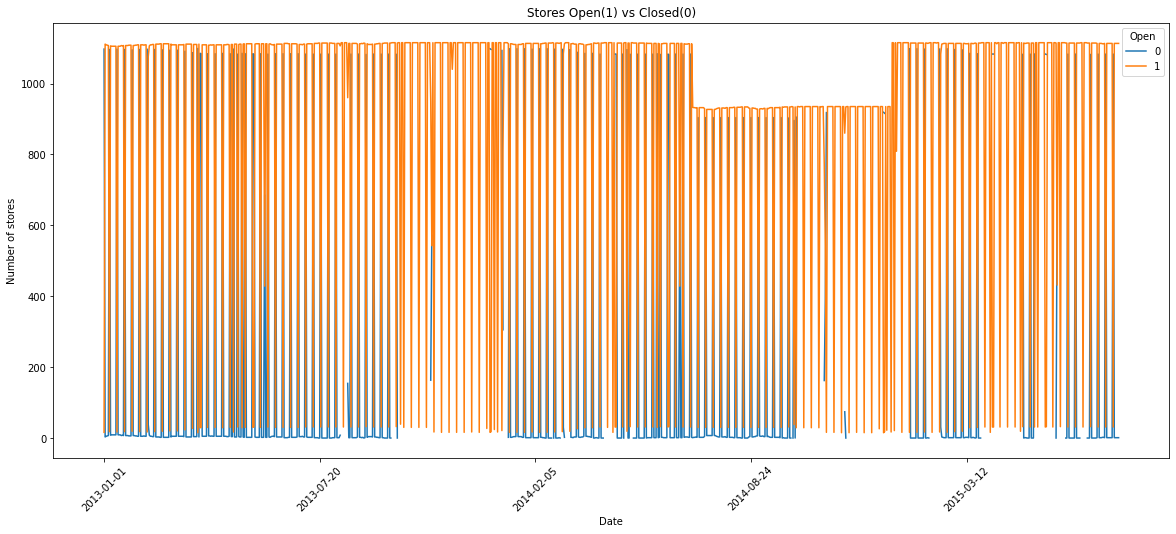

In [329]:
# plot the result
sales_df.groupby(['Date','Open']).Store.count().unstack().plot(figsize=(20,8)) 
plt.xticks(rotation=45)
plt.title('Stores Open(1) vs Closed(0)')
plt.ylabel('Number of stores')
plt.show() 

In [7]:
# only keep open stores and remove closed stores
open_sales_df = sales_df[sales_df.Open==1]

In [8]:
# Let's drop the open column since it has no meaning now
open_sales_df.drop('Open', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
open_sales_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [111]:
with pd.option_context('float_format', '{:.2f}'.format):
  display(open_sales_df.describe())

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.00,844392.00,844392.00,844392.00,844392.00,844392.00
mean,558.42,3.52,6955.51,762.73,0.45,0.19
std,321.73,1.72,3104.21,401.23,0.50,0.40
min,1.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,4859.00,519.00,0.00,0.00
50%,558.00,3.00,6369.00,676.00,0.00,0.00
75%,837.00,5.00,8360.00,893.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00


In [ ]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)

EXPLORE STORES INFORMATION DATA

In [7]:
# Let's see if we have any missing data in the store information dataframe!
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [146]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing 
store_df[store_df.CompetitionDistance.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [147]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_df[store_df.CompetitionOpenSinceMonth.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [148]:
store_df[store_df.Promo2SinceWeek.isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [121]:
store_df[store_df.Promo2SinceWeek.isnull()].describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,544.000000,542.000000,396.000000,396.000000,544.0,0.0,0.0
mean,555.531250,6549.520295,7.260101,2009.123737,0.0,NaN,NaN
std,317.491536,9374.321188,3.176739,4.326819,0.0,NaN,NaN
min,1.000000,30.000000,1.000000,1990.000000,0.0,NaN,NaN
25%,280.250000,992.500000,4.000000,2006.000000,0.0,NaN,NaN
50%,559.000000,2640.000000,8.000000,2010.000000,0.0,NaN,NaN
75%,827.250000,8105.000000,10.000000,2013.000000,0.0,NaN,NaN
max,1114.000000,75860.000000,12.000000,2015.000000,0.0,NaN,NaN


Promo2 has only value 0 for these NaN fields

In [9]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros

store_df.fillna(value={'Promo2SinceWeek':0, 'Promo2SinceYear':0, 'PromoInterval':0}, inplace=True)

In [10]:
store_df.fillna(value={'CompetitionOpenSinceYear':0, 'CompetitionOpenSinceMonth':0}, inplace=True)

In [11]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
store_df.fillna(value={'CompetitionDistance':store_df.CompetitionDistance.mean()}, inplace=True)

In [12]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [153]:
with pd.option_context('float_format', '{:.2f}'.format):
  display(store_df.describe())

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00,1115.00,1115.00,1115.00,1115.00,1115.00,1115.00
mean,558.00,5404.90,4.93,1370.94,0.51,12.08,1030.24
std,322.02,7652.85,4.28,935.47,0.50,15.54,1006.04
min,1.00,20.00,0.00,0.00,0.00,0.00,0.00
25%,279.50,720.00,0.00,0.00,0.00,0.00,0.00
50%,558.00,2330.00,4.00,2006.00,1.00,1.00,2009.00
75%,836.50,6875.00,9.00,2011.00,1.00,22.00,2012.00
max,1115.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [ ]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

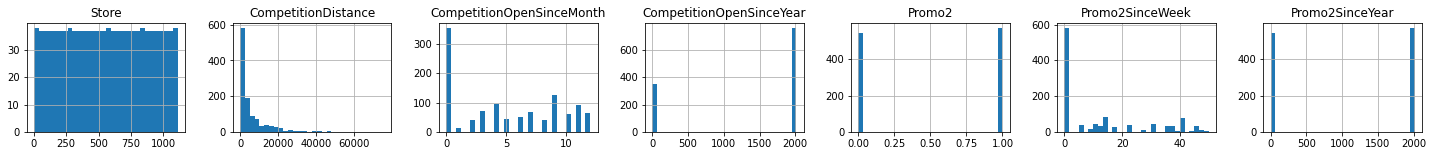

In [317]:
store_df.hist(bins=30, layout=(1,7), figsize=(25,2))
plt.show()

## EXPLORE MERGED DATASET 

In [13]:
# Let's merge both data frames together based on 'store'
df = pd.merge(left=open_sales_df,right=store_df, how='left', on='Store')
df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0


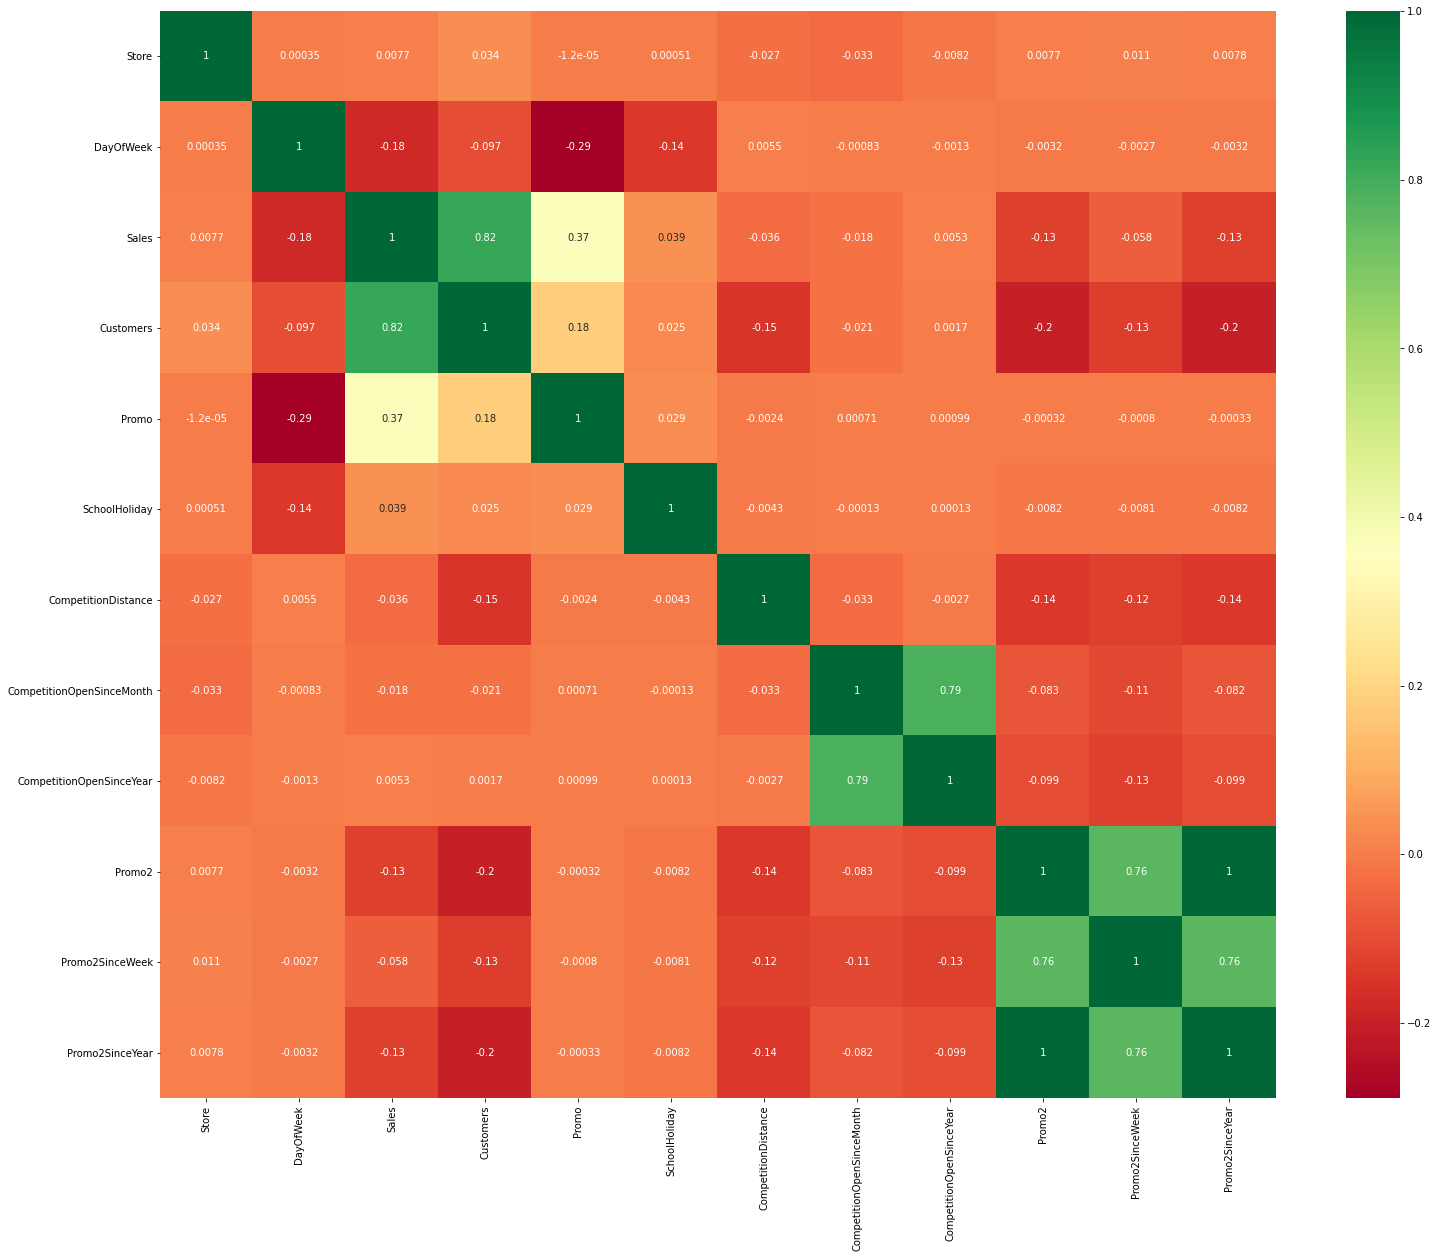

In [160]:
correlations = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(data=correlations, annot=True, cmap="RdYlGn")

In [ ]:
# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all because we do not observe any correlation with Sales

In [331]:
correlations = df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
Day                         -0.051849
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
Year                         0.036169
SchoolHoliday                0.038617
Month                        0.073600
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

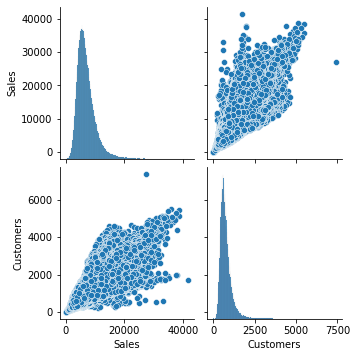

In [165]:
sns.pairplot(df[['Sales','Customers']])
# Customers/Promo and sales are strongly correlated 

In [14]:
# Let's separate the year and put it into a separate column
df.Date = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year']=df.Date.apply(lambda x: x.year)

In [15]:
# Let's do the same for the Day and Month
df['Month']=df.Date.apply(lambda x: x.month)
df['Day']=df.Date.apply(lambda x: x.day)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Promo                      844392 non-null  int64         
 6   StateHoliday               844392 non-null  object        
 7   SchoolHoliday              844392 non-null  int64         
 8   StoreType                  844392 non-null  object        
 9   Assortment                 844392 non-null  object        
 10  CompetitionDistance        844392 non-null  float64       
 11  CompetitionOpenSinceMonth  844392 non-null  float64 

In [16]:
df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0,2013,1,1
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0,2013,1,1
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0,2013,1,1


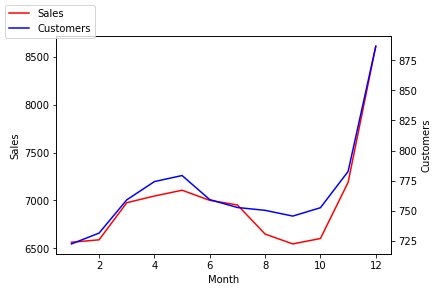

In [339]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe
ax = sns.lineplot(data=df.groupby('Month')[['Sales','Customers']].mean(), x='Month', y='Sales', color='r', label='Sales', legend=False)
ax2 = plt.twinx()
sns.lineplot(data=df.groupby('Month')[['Sales','Customers']].mean(), x='Month', y='Customers', ax=ax2, color='b', label='Customers', legend=False)
ax.figure.legend(loc='upper left')
plt.show()

In [185]:
df.groupby('Day')[['Sales','Customers']].mean()

,Sales,Customers
Day,,
1,8053.674102,846.284593
2,7987.452335,842.344108
3,7765.296991,818.100766
4,7745.844134,819.085296
5,7554.982112,802.752484
6,7149.914351,778.836139
7,7101.113826,776.275080
8,6785.121061,757.211580
9,6499.276895,730.633183


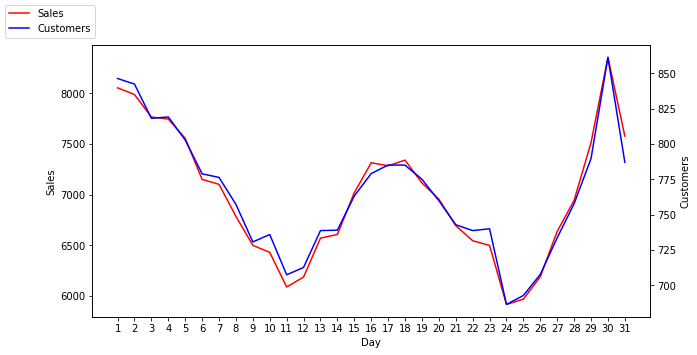

In [216]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df.groupby('Day')[['Sales','Customers']].mean(), x='Day', y='Sales', color='r', label='Sales', legend=False)
ax2 = plt.twinx()
sns.lineplot(data=df.groupby('Day')[['Sales','Customers']].mean(), x='Day', y='Customers', ax=ax2, color='b', label='Customers', legend=False)
ax.figure.legend(loc='upper left', )
plt.xticks(range(1,32))
plt.show()


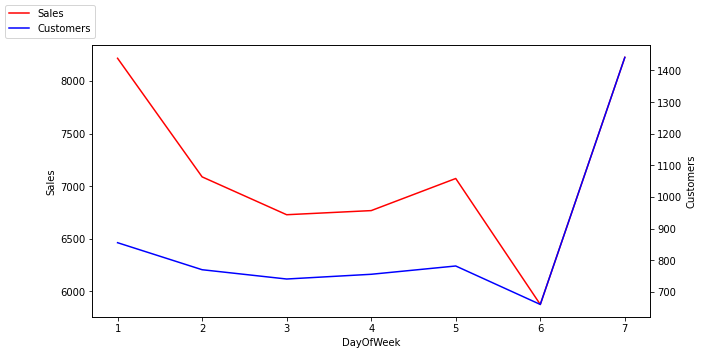

In [230]:
# Let's do the same for the day of the week  (note that 7 = Sunday)
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=df.groupby('DayOfWeek')[['Sales','Customers']].mean(), x='DayOfWeek', y='Sales', color='r', label='Sales', legend=False)
ax2 = plt.twinx()
sns.lineplot(data=df.groupby('DayOfWeek')[['Sales','Customers']].mean(), x='DayOfWeek', y='Customers', ax=ax2, color='b', label='Customers', legend=False)
ax.figure.legend(loc='upper left', )
plt.show()

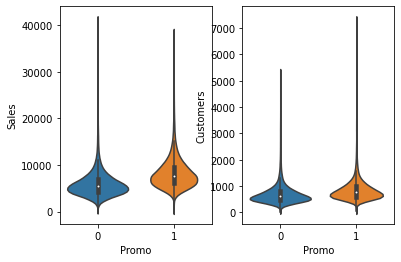

In [23]:
plt.subplots(1,2)
plt.subplot(121)
sns.violinplot(data=df, x='Promo', y='Sales')
plt.subplot(122)
sns.violinplot(data=df, x='Promo', y='Customers')
plt.show()

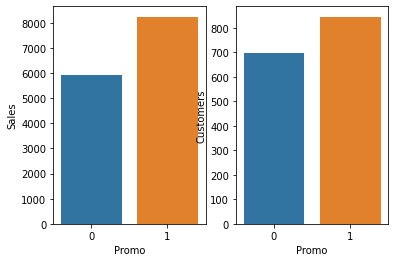

In [32]:
plt.subplots(1,2)
plt.subplot(121)
sns.barplot(data=df, x='Promo', y='Sales')
plt.subplot(122)
sns.barplot(data=df, x='Promo', y='Customers')
plt.show()

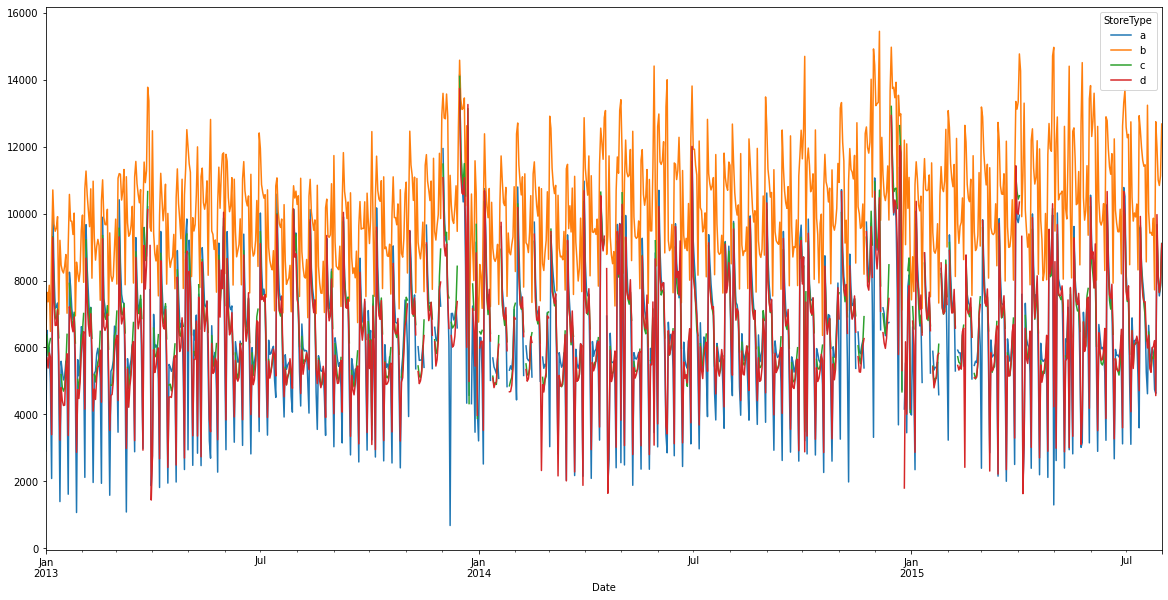

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)
plt.show()

# UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET
- https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/
- https://facebook.github.io/prophet/docs/installation.html#python

- How Prophet works: At its core, the Prophet procedure is an additive regression model with four main components:
  - A piecewise linear or logistic growth curve trend. Prophet automatically detects changes in trends by selecting changepoints from the data.
  - A yearly seasonal component modeled using Fourier series.
  - A weekly seasonal component using dummy variables.
  - A user-provided list of important holidays.

# TASK #5: TRAIN THE MODEL PART A

In [17]:
# import prophet 
!pip install fbprophet

In [18]:
from fbprophet import Prophet
# Visualization tool: leverage plotly for interactive visualization
from fbprophet.plot import plot_plotly, plot_components_plotly   
# Performance evaluation tools
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [25]:
def forecast_sales(store_id, df, periods):
  store_df = df[df['Store']==store_id]
  store_df = store_df[['Date', 'Sales']].rename(columns={'Date':'ds', 'Sales':'y'})
  model= Prophet(daily_seasonality=True)
  model.fit(store_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)

  #figure1 = model.plot(forecast, xlabel='date', ylabel='sales')
  #plt.title(f'Sales forecast for Store n°{store_id}')
  #figure2= model.plot_components(forecast)

  return model, forecast

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [17]:
model, forecast = forecast_sales(10, df, periods=120)
plot_plotly(model, forecast)

In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
899,2015-11-24,5709.472046,5425.597446,7561.229595,5708.731912,5710.229050,769.991519,769.991519,769.991519,323.258059,323.258059,323.258059,197.497950,197.497950,197.497950,249.235510,249.235510,249.235510,0.0,0.0,0.0,6479.463565
900,2015-11-25,5710.244510,5119.051092,7159.510360,5709.496816,5711.009627,367.695004,367.695004,367.695004,323.258059,323.258059,323.258059,-229.335631,-229.335631,-229.335631,273.772576,273.772576,273.772576,0.0,0.0,0.0,6077.939514
901,2015-11-26,5711.016974,5030.628324,7182.924017,5710.265117,5711.791681,415.522430,415.522430,415.522430,323.258059,323.258059,323.258059,-209.208066,-209.208066,-209.208066,301.472437,301.472437,301.472437,0.0,0.0,0.0,6126.539404
902,2015-11-27,5711.789438,5351.865709,7429.248345,5711.029711,5712.575866,695.598786,695.598786,695.598786,323.258059,323.258059,323.258059,39.910924,39.910924,39.910924,332.429804,332.429804,332.429804,0.0,0.0,0.0,6407.388224
903,2015-11-28,5712.561902,4569.408591,6724.371006,5711.792792,5713.354811,-55.441167,-55.441167,-55.441167,323.258059,323.258059,323.258059,-745.341696,-745.341696,-745.341696,366.642470,366.642470,366.642470,0.0,0.0,0.0,5657.120735


Prophet components plot which graphically describes the model it has fit

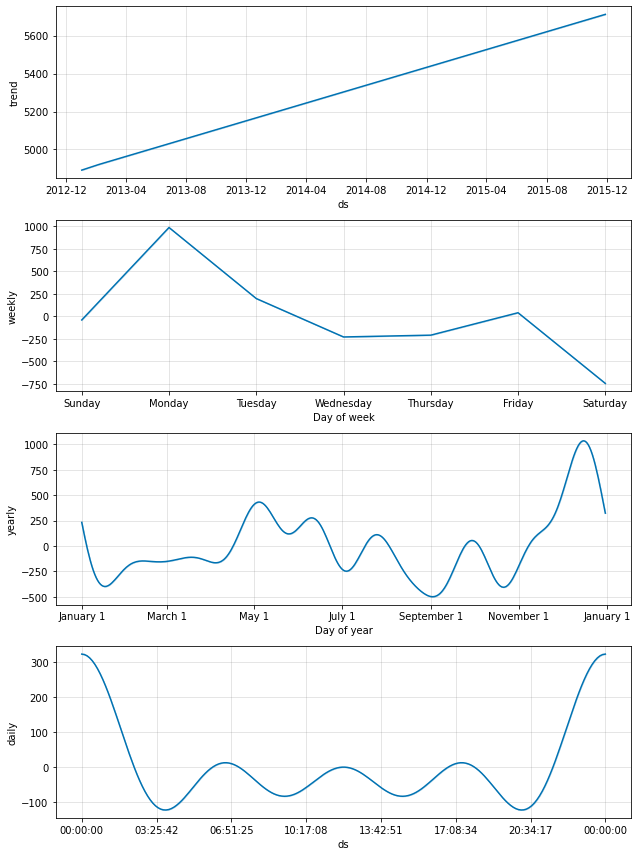

In [150]:
figure2= model.plot_components(forecast)

In [19]:
# Interactive methods
plot_components_plotly(model, forecast)

More details about the options available for each method are available via help(Prophet) or help(Prophet.fit)

# TRAIN THE MODEL INCORPORATING HOLIDAYS


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [19]:
# Get all the dates pertaining to school holidays
school_df = pd.DataFrame({'ds':df[df.SchoolHoliday==1].Date, 'holiday':'school'})
school_df

,ds,holiday
0,2015-07-31,school
1,2015-07-31,school
2,2015-07-31,school
3,2015-07-31,school
4,2015-07-31,school
...,...,...
844387,2013-01-01,school
844388,2013-01-01,school
844389,2013-01-01,school
844390,2013-01-01,school


In [20]:
set(df.StateHoliday)

{0, '0', 'a', 'b', 'c'}

In [21]:
state_df = pd.DataFrame({'ds':df[df.StateHoliday==('a' or 'b' or 'c')].Date, 'holiday':'state'})
state_df

,ds,holiday
54837,2015-06-04,state
54838,2015-06-04,state
54857,2015-06-04,state
54858,2015-06-04,state
54860,2015-06-04,state
...,...,...
844387,2013-01-01,state
844388,2013-01-01,state
844389,2013-01-01,state
844390,2013-01-01,state


In [22]:
# concatenate both school and state holidays 
holidays = pd.concat([school_df,state_df], axis=0)  # concatenate lines, ie form the combination of all lines from both df
holidays

,ds,holiday
0,2015-07-31,school
1,2015-07-31,school
2,2015-07-31,school
3,2015-07-31,school
4,2015-07-31,school
...,...,...
844387,2013-01-01,state
844388,2013-01-01,state
844389,2013-01-01,state
844390,2013-01-01,state


# Perform prediction and evaluate model performance

In [34]:
def performance_evaluation(model, days):
  df_cv = cross_validation(model, initial='366 days', period=f'{days} days', horizon =f'{days} days',)
  print(df_cv.head())
  print()
  df_p = performance_metrics(df_cv)
  print(df_p.head())
  print()
  fig = plot_cross_validation_metric(df_cv, metric='rmse')
  plt.title('Model performance with Cross validation and RMSE')

In [25]:
def forecast_sales(store_id, df, holidays, periods):
  print(f'Sales forecast for Store n°{store_id}')
  store_df = df[df['Store']==store_id]
  store_df = store_df[['Date', 'Sales']].rename(columns={'Date':'ds', 'Sales':'y'})
  model= Prophet( holidays=holidays)
  model.fit(store_df)
  future = model.make_future_dataframe(periods=periods)
  forecast = model.predict(future)

  #figure1 = model.plot(forecast, xlabel='date', ylabel='sales')
  #plt.title(f'Sales forecast for Store n°{store_id}')
  
  return model, forecast

In [26]:
# Let's make predictions using holidays for a specific store
model, forecast = forecast_sales(10, df, holidays, periods=90)

plot_plotly(model, forecast)

Sales forecast for Store n°10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


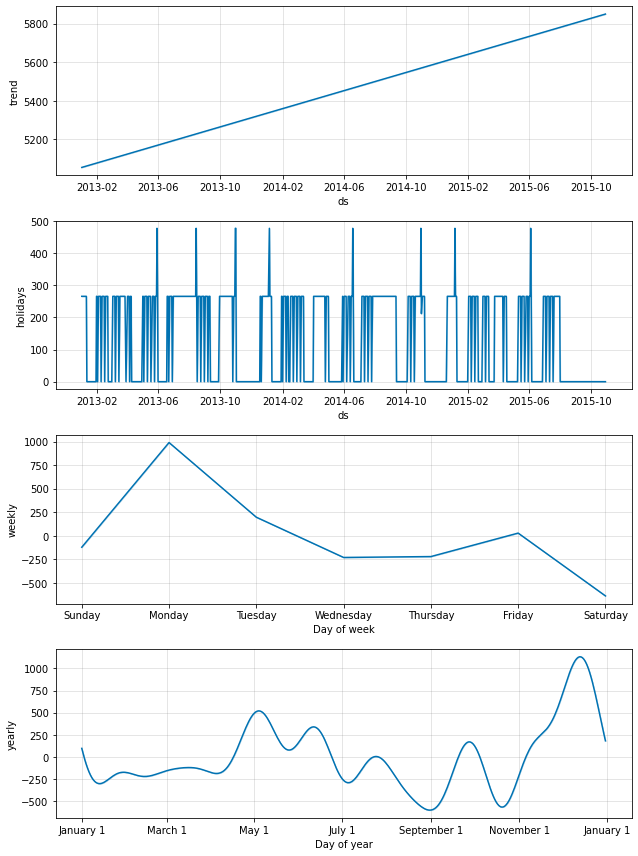

In [147]:
figure2= model.plot_components(forecast)

INFO:fbprophet:Making 6 forecasts with cutoffs between 2014-02-06 00:00:00 and 2015-05-02 00:00:00


performance evaluation



          ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2014-02-07  5597.673647  4621.026544  6623.260522  4686 2014-02-06
1 2014-02-08  4631.367666  3634.908671  5621.171287  4802 2014-02-06
2 2014-02-10  6677.040844  5633.989052  7674.843220  4809 2014-02-06
3 2014-02-11  5750.884227  4791.820110  6789.895544  5372 2014-02-06
4 2014-02-12  5380.978696  4322.362915  6394.991656  4723 2014-02-06
  horizon            mse        rmse         mae      mape     mdape  coverage
0  9 days  874085.573782  934.925438  708.483067  0.138309  0.103589  0.818182
1 10 days  880046.801339  938.108097  713.565350  0.140271  0.108539  0.818182
2 11 days  946342.086513  972.801155  755.523970  0.147417  0.124467  0.795455
3 12 days  951826.508052  975.615963  753.341133  0.145054  0.124467  0.777273
4 13 days  867119.729721  931.192638  718.732195  0.136057  0.117308  0.777273


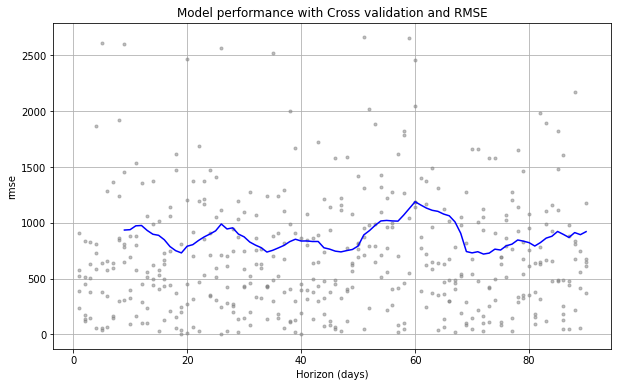

In [30]:
print('performance evaluation')
performance_evaluation(model,90)

In [154]:
# Let's make predictions using holidays for a specific store
model, forecast = forecast_sales(6, df, holidays, periods=90)
plot_plotly(model, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Sales forecast for Store n°6


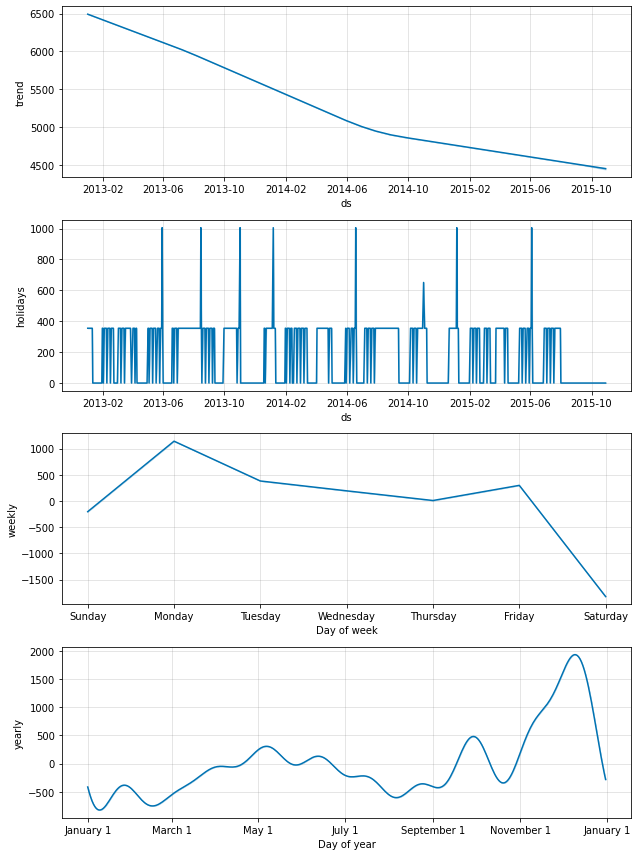

In [155]:
figure2= model.plot_components(forecast)

In [32]:
# Let's evaluate performance on a shorter horizon to see how it affects the model accuracy
model, forecast = forecast_sales(10, df, holidays, periods=15)
plot_plotly(model, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Sales forecast for Store n°10


INFO:fbprophet:Making 38 forecasts with cutoffs between 2014-01-07 00:00:00 and 2015-07-16 00:00:00


performance evaluation



          ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2014-01-08  5348.841946  4397.190434  6357.051630  5650 2014-01-07
1 2014-01-09  5353.526061  4415.961945  6332.674239  5109 2014-01-07
2 2014-01-10  5561.900614  4574.407831  6568.532818  5939 2014-01-07
3 2014-01-11  4678.599574  3757.817610  5677.543472  4504 2014-01-07
4 2014-01-13  6373.679387  5411.130224  7411.583001  5164 2014-01-07

  horizon            mse        rmse         mae      mape     mdape  coverage
0  2 days  514004.755139  716.941249  609.212388  0.110582  0.095896  0.792553
1  3 days  616955.668244  785.465256  646.269919  0.127048  0.095069  0.811090
2  4 days  585619.197758  765.257602  622.360563  0.123409  0.092858  0.838710
3  5 days  950068.015348  974.714325  749.464180  0.148261  0.114438  0.778312
4  6 days  857795.244250  926.172362  725.758385  0.142290  0.105273  0.776596



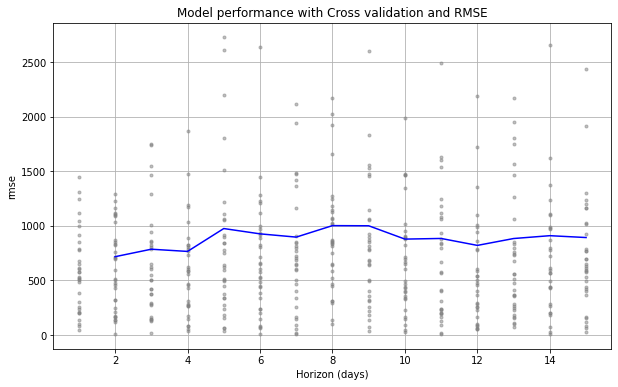

In [35]:
print('performance evaluation')
performance_evaluation(model,15)

Other algorithms can be used for this prediction :
- DeepAR
- LSTM network
- XGBoost
- StatModels

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing

In [ ]:
import lightgbm as lgb

base_lgb_model = lgb.LGBMRegressor(n_leaves=50,
                               n_estimators=700, 
                               max_depth=-1,  
                               learning_rate=0.3, #0.1
                               subsample=1,
                               colsample_bytree=0.8,
                               reg_alpha=0.1,
                               reg_lambda=1)

base_lgb_model.fit(X_train, Y_train)

In [ ]:
y_pred=base_lgb_model.predict(X_test)
pred_df=pd.DataFrame({'Predictions':y_pred,'Actual':Y_test})
pred_df=pred_df.reset_index(drop=True)
pred_df.head()

In [ ]:
plt.figure(figsize=(10,10))
pred_df["Actual"][:25,].plot.line()
pred_df["Predictions"][:25,].plot.line()
plt.legend()
plt.show()

In [ ]:
base_lgb_model.score(X_test,Y_test)

# DeepAR (Amazon)
- https://blog.engineering.publicissapient.fr/2020/04/01/lanalyse-de-series-temporelles-avec-prophet-et-deepar/

In [23]:
!pip install gluonts

     |████████████████████████████████| 573kB 7.3MB/s 
     |████████████████████████████████| 194kB 13.6MB/s 
     |████████████████████████████████| 8.7MB 11.7MB/s 
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68028 sha256=2b0affca6bbb86fce890bffa8b76653aacf1c002fd8b1330bac24342e02c23ee
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built ujson


In [24]:
!pip install mxnet

     |████████████████████████████████| 55.0MB 80kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [25]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer
from gluonts.dataset.common import ListDataset
from gluonts.evaluation.backtest import make_evaluation_predictions
from datetime import datetime, timedelta

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

gluonts.trainer is deprecated. Use gluonts.mx.trainer instead.



In [ ]:
estimator = DeepAREstimator(freq=data_freq, 
                            prediction_length=7*24,
                            trainer=Trainer(epochs=30, learning_rate=0.0001))

training_data = ListDataset(
    [{"item_id":...,
      "start": ...,
      "target": ...}],
 freq = "H")

estimator.train(training_data)

In [26]:
def train_predictor(df, end_train_date, target_col='Sales'):
    estimator = DeepAREstimator(freq='d', 
                                prediction_length=7*24,
                                trainer=Trainer()
                                )
    
    training_data = ListDataset(
            [{
                "start": df.index[0],
              "target": df[target_col][:end_train_date]
             }],
            freq = 'd'
        )

    predictor = estimator.train(training_data=training_data)
    
    return predictor

In [27]:
def make_predictions(predictor, df, test_date, target_col='Sales'):
  test_data = ListDataset(
            [{
                "start": df.index[0],
              "target": df[target_col][:test_date + timedelta(hours=7*24)],
             }],
            freq = 'd'
            )

  forecast_it, ts_it = make_evaluation_predictions(test_data, predictor=predictor, num_eval_samples=100)
    
  return list(forecast_it), list(ts_it)

In [ ]:
idf_predictor = train_predictor(df, end_train_date=80000)

#plot_forecasts(df_dict, test_date, tss, forecasts, past_length=2*nb_hours_pred, num_plots=1, figname="Paris seul")

  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


 22%|██▏       | 11/50 [00:10<00:37,  1.05it/s, epoch=1/100, avg_epoch_loss=9.93]

In [ ]:
forecasts, tss = make_predictions(idf_predictor, df, test_date=842000)

In [ ]:
test_data = ListDataset(
            [{"item_id": ...,
              "start": ...,
              "target": ...}],
              freq = "H")

forecast_it, ts_it = make_evaluation_predictions(test_data, predictor=predictor, num_eval_samples=100)